In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 12 12:45:05 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 30
memory = [10, 20, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap = 10**(-10), abs_gap = 10**(-10), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=2042.9971362761228, L=-20000.0, U=-9.784749520949529
k=1, rel_gap=8.765645774274777, L=-95.55439781159792, U=-9.784749520949529


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=2, rel_gap=6.7763515467400595, L=-89.49902039344958, U=-11.509127365900614
k=3, rel_gap=1.138661258284456, L=-88.58553443537072, U=-41.421021721986165
k=4, rel_gap=0.5255223012376017, L=-87.07822784775087, U=-57.08092748110428
k=5, rel_gap=0.3640108353501731, L=-87.07822784776398, U=-63.8398358656799
k=6, rel_gap=0.20695942822882687, L=-84.88635470617659, U=-70.33074411684618
k=7, rel_gap=0.1492571130111612, L=-84.56101584624588, U=-73.57884923129873
k=8, rel_gap=0.10256489993052417, L=-84.56101584628716, U=-76.69481937218897
k=9, rel_gap=0.07550022369216375, L=-84.17220471628397, U=-78.26330749362657
k=10, rel_gap=0.050868910742525, L=-84.05846351325486, U=-79.98948551428805
k=11, rel_gap=0.2995607817313264, L=-105.18309448178398, U=-80.93741821113969
k=12, rel_gap=0.2578023987212295, L=-101.80327877227482, U=-80.93741821113969
k=13, rel_gap=0.19423779632766466, L=-96.65852396492205, U=-80.93741821113969
k=14, rel_gap=0.13865666301514093, L=-92.15993053335721, U=-80.93741821113969
k

# Centralized solution

In [5]:
h_cvx = ob.cvx_multi_commodity_flow(params=params)[2]

# Plot

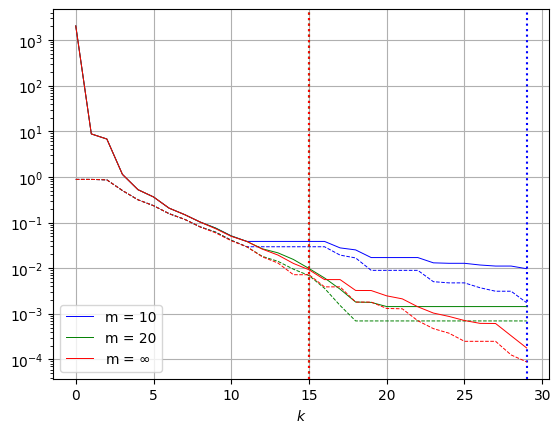

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)